In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sms
import statsmodels.formula.api as statsmodel
from statsmodels.formula.api import ols 
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import zscore      
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import VarianceThreshold

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('Insurance_Marketing-Customer-Value-Analysis.csv')

In [4]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/2011,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/2011,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/2011,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/2011,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/2011,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
df.info()
# There are no missing values in our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
Customer                         9134 non-null object
State                            9134 non-null object
Customer Lifetime Value          9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception    9134 non-null int64
Number of Open Complaints        9134 non-null int64
Number of Policies               

# Univariate Analysis

In [6]:
columns_int = df.select_dtypes(include = 'number')

In [7]:
l1=list(columns_int.columns)

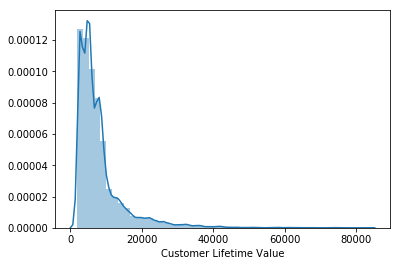

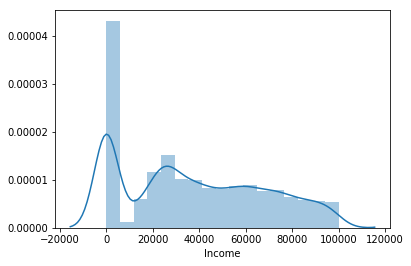

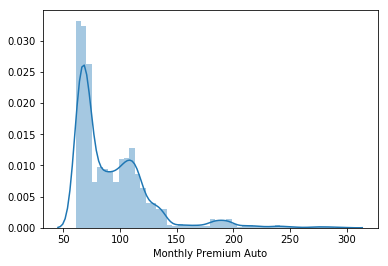

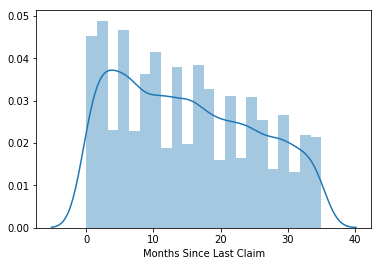

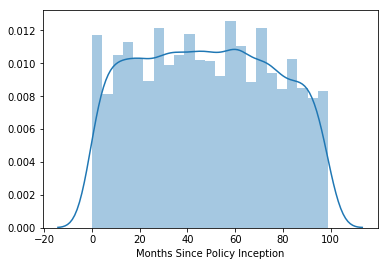

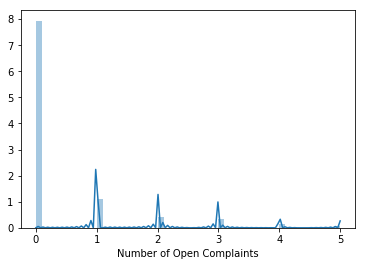

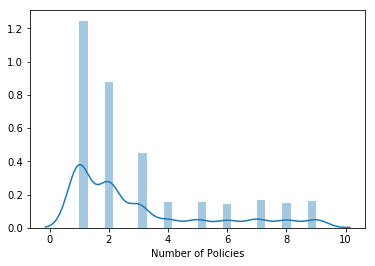

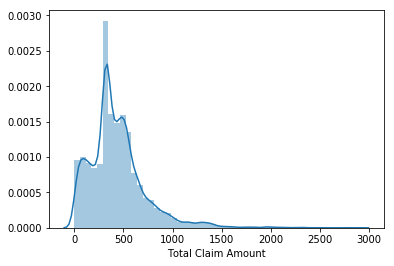

In [8]:
for i in range(0,len(l1)):
    sns.distplot(columns_int[l1[i]])
    plt.show()
    
# We see that claims, premium and lifetime value all are highly rightwards skewed.

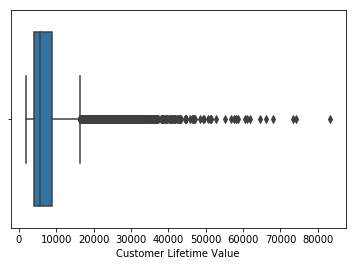

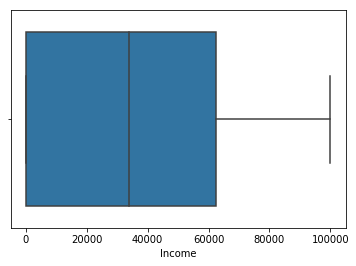

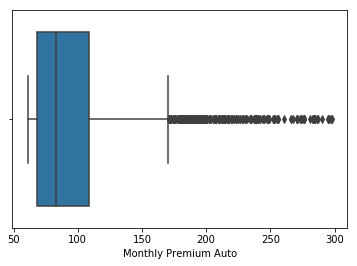

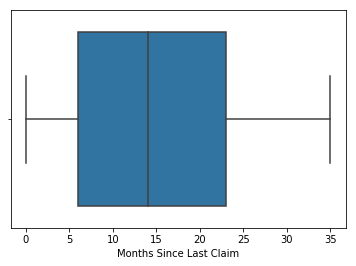

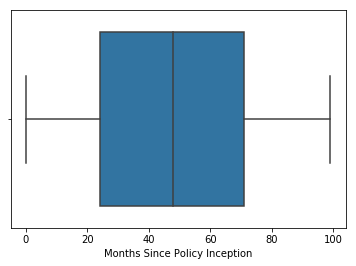

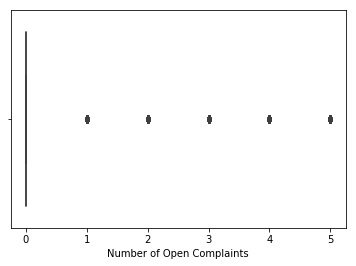

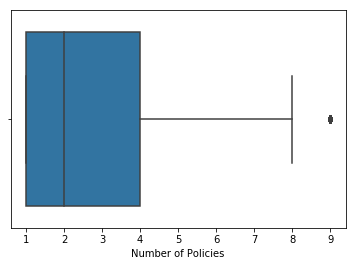

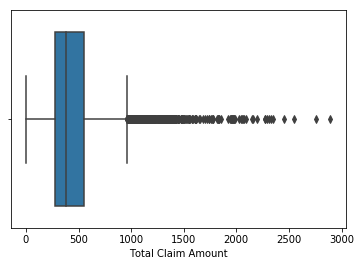

In [9]:
for i in range(0,len(l1)):
    sns.boxplot(columns_int[l1[i]])
    plt.show()
    
# We see that claims, premium and lifetime value all have outliers present.

In [10]:
columns = df.select_dtypes(include = 'object')

In [11]:
columns.drop(['Customer', 'Effective To Date'], axis=1, inplace=True)

D:\notebook\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [12]:
l2=list(columns.columns)

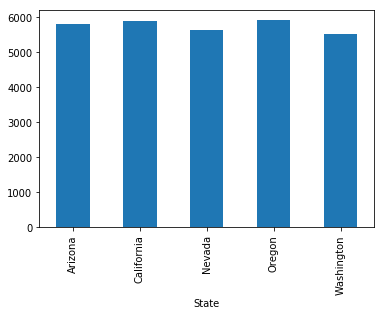

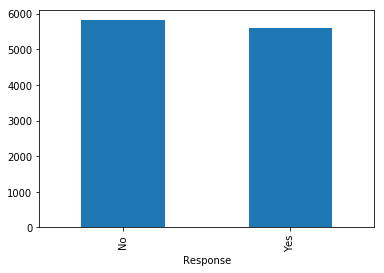

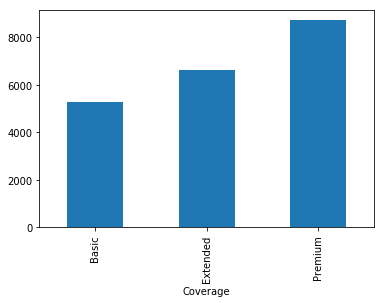

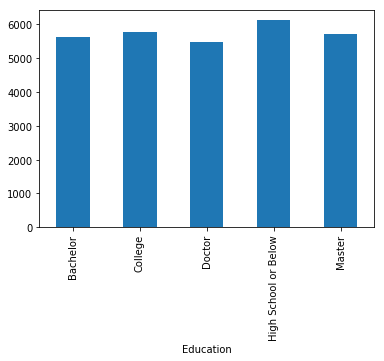

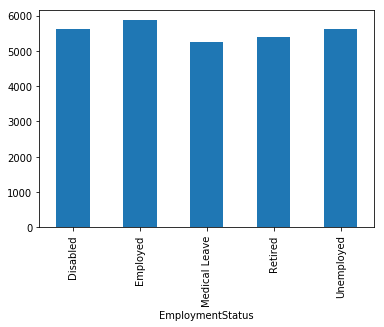

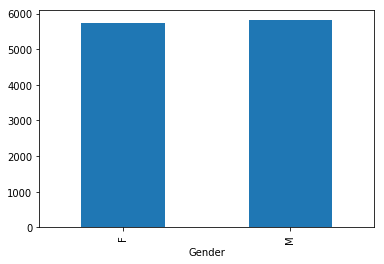

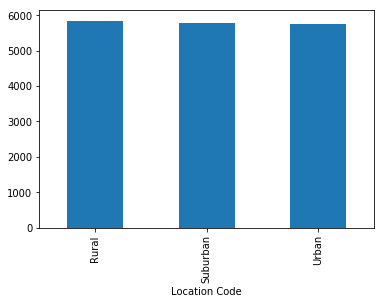

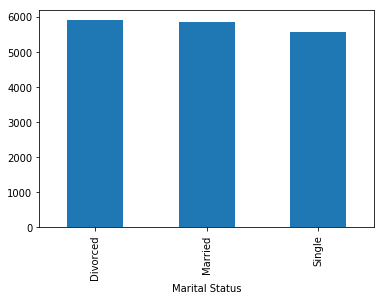

In [13]:
for i in range(0,len(l1)):
    df.groupby(columns[l2[i]])['Customer Lifetime Value'].median().plot(kind='bar')
    plt.show()

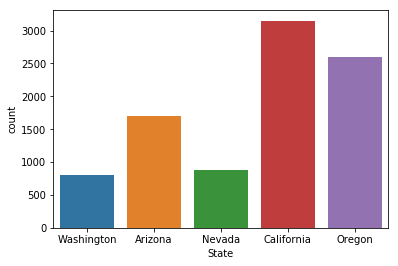

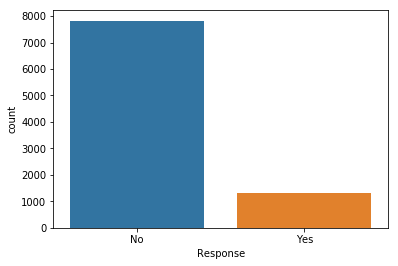

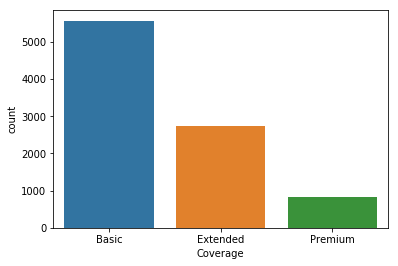

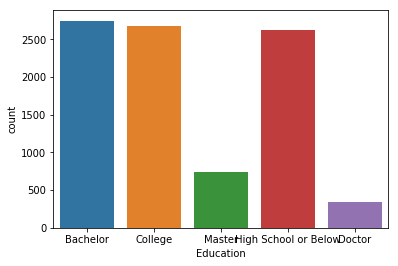

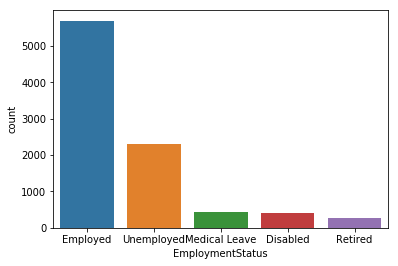

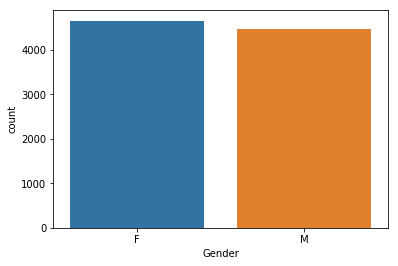

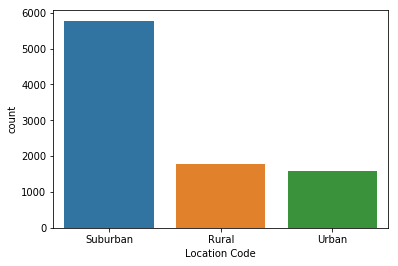

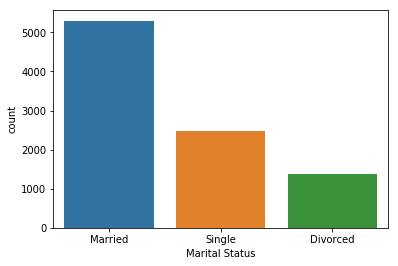

In [14]:
for i in range(0,len(l1)):
    sns.countplot(columns[l2[i]])
    plt.show()

# Bivariate Analysis

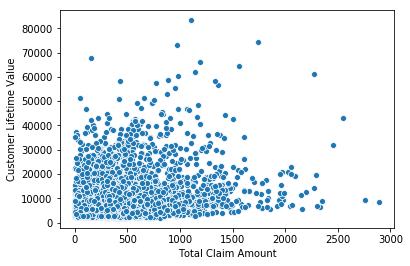

In [15]:
sns.scatterplot(df['Total Claim Amount'], df['Customer Lifetime Value'])

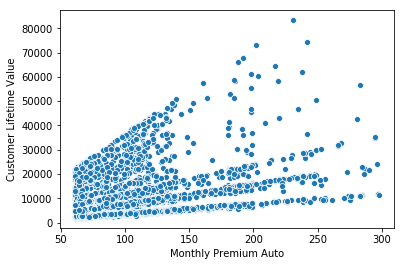

In [16]:
sns.scatterplot(df['Monthly Premium Auto'], df['Customer Lifetime Value'])

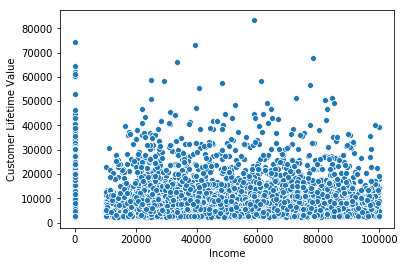

In [17]:
sns.scatterplot(df['Income'], df['Customer Lifetime Value'])

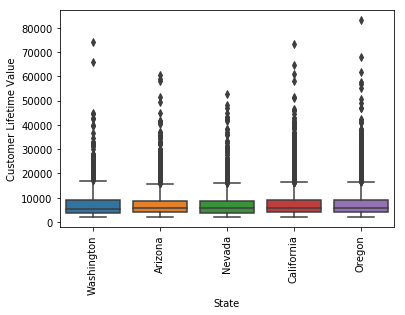

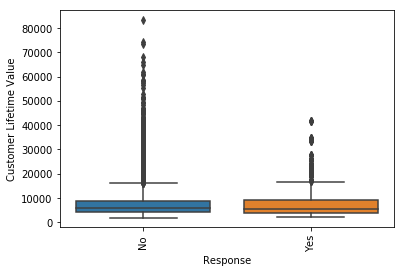

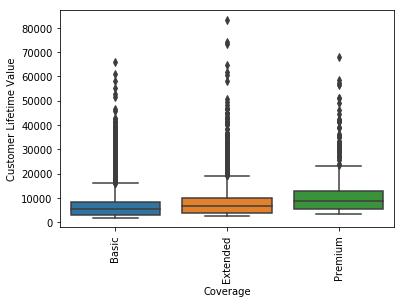

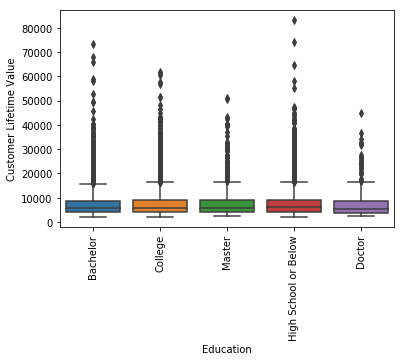

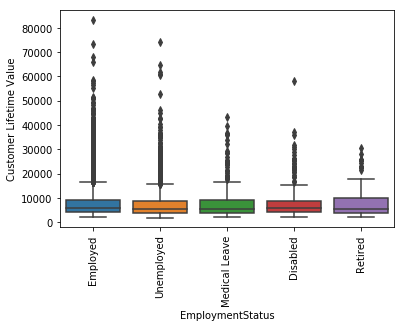

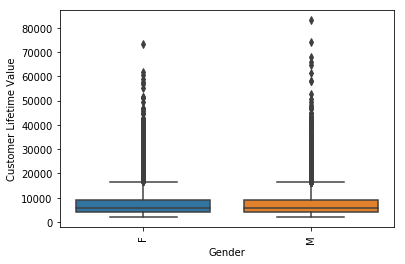

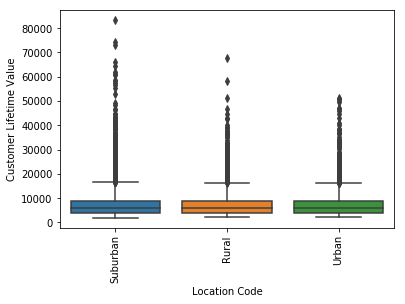

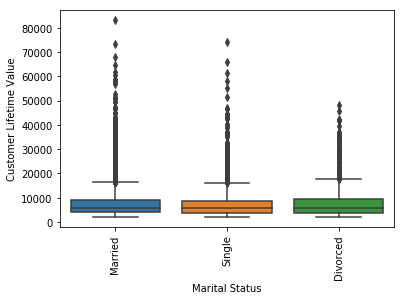

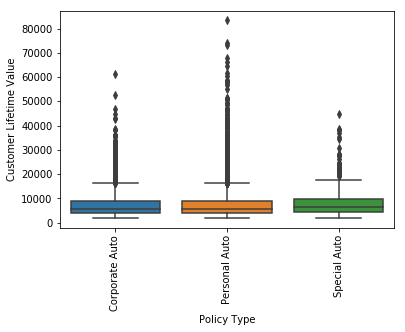

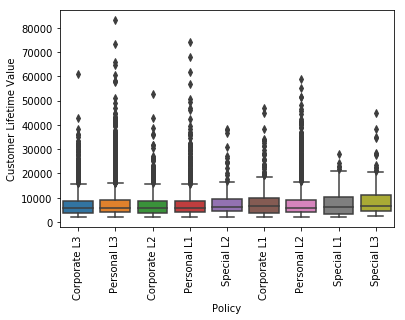

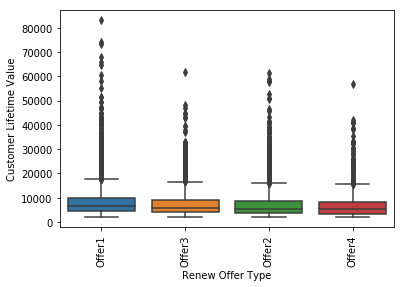

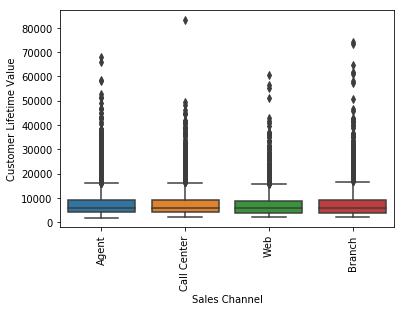

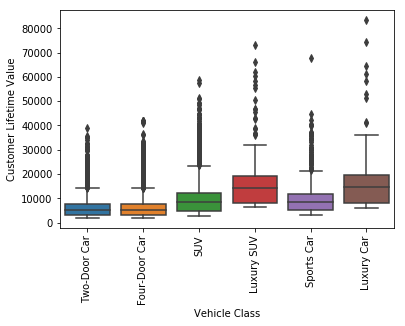

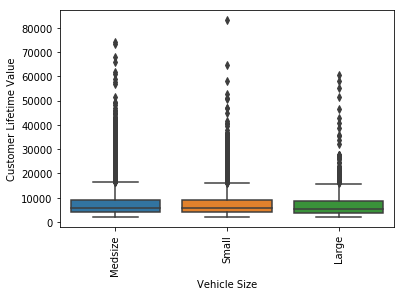

In [18]:
for i in range(0,len(l2)):
    sns.boxplot(l2[i],df['Customer Lifetime Value'],data=df)
    plt.xticks(rotation=90)
    plt.show()

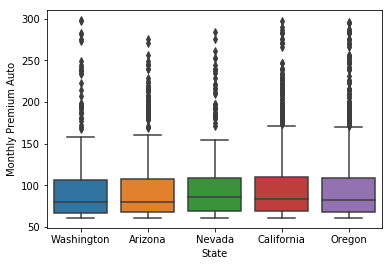

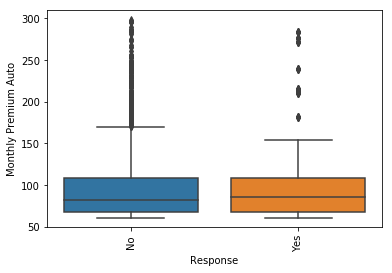

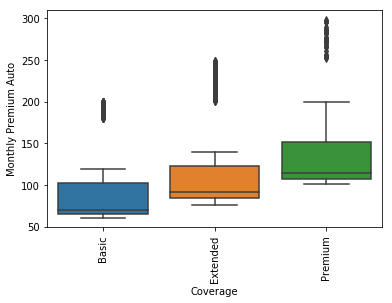

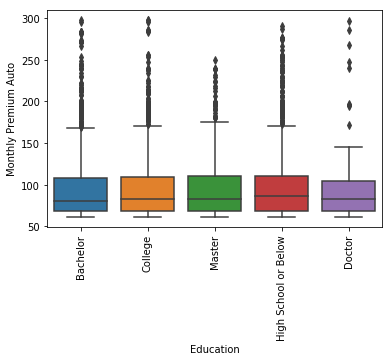

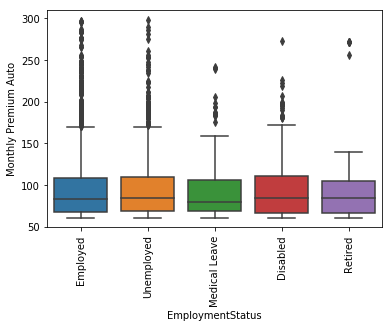

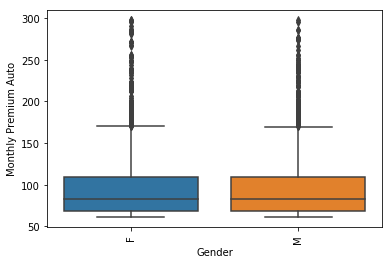

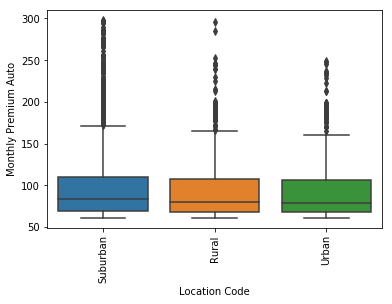

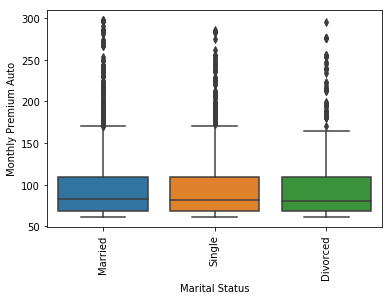

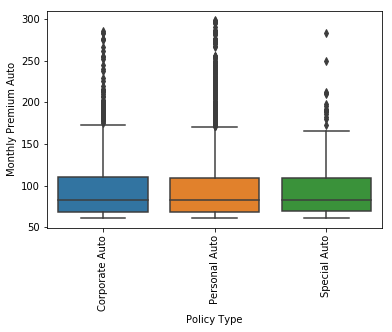

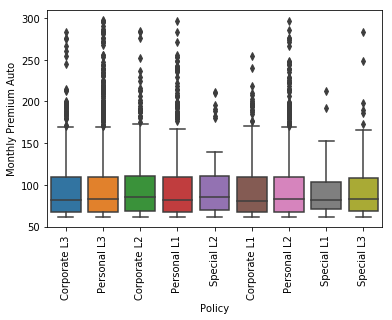

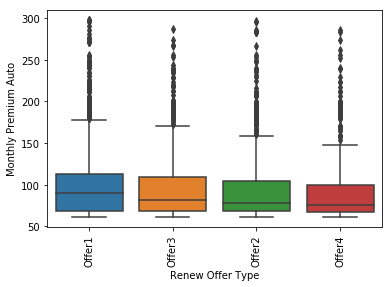

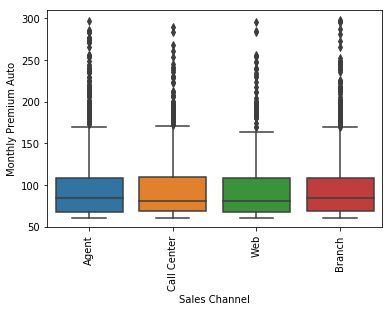

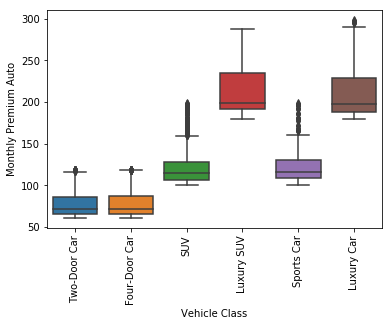

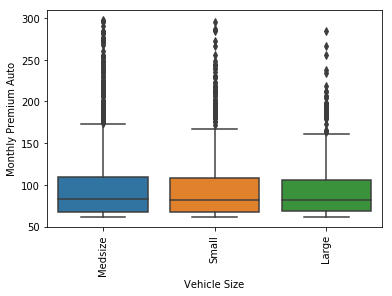

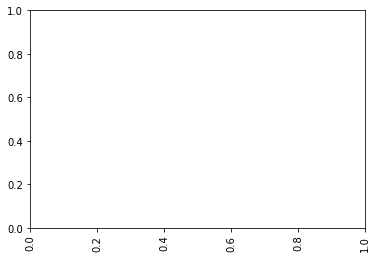

In [19]:
for i in range(0,len(l2)):
    sns.boxplot(l2[i],df['Monthly Premium Auto'],data=df)
    plt.show()
    plt.xticks(rotation=90)

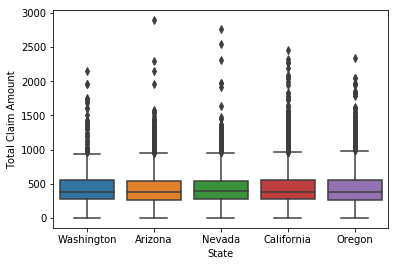

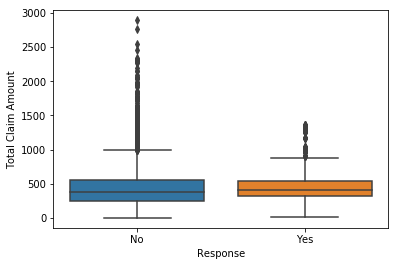

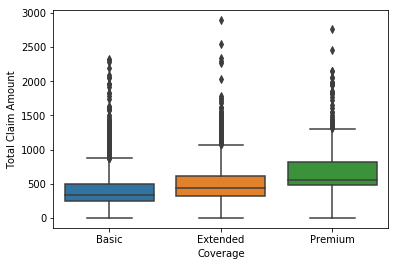

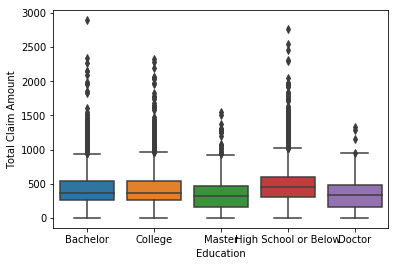

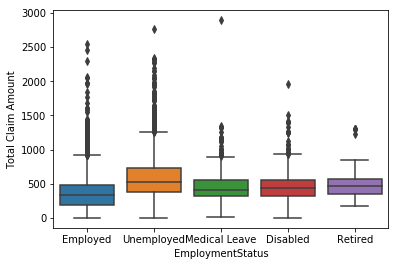

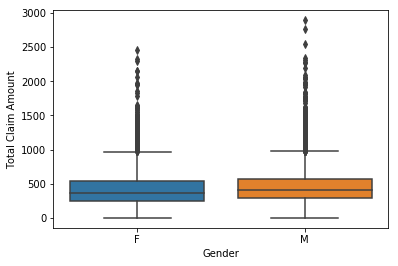

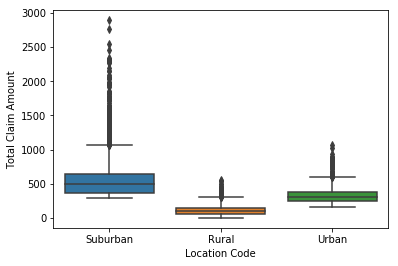

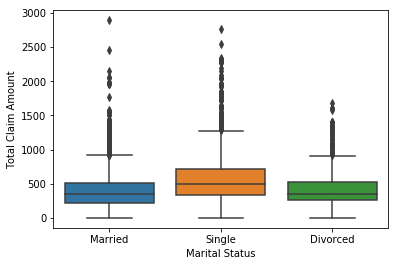

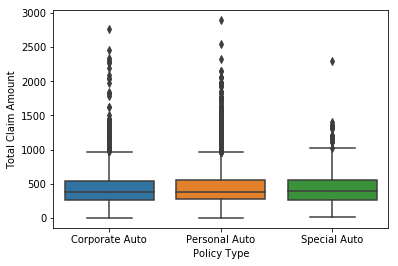

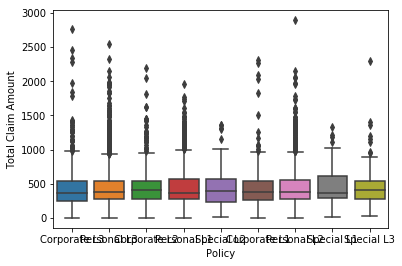

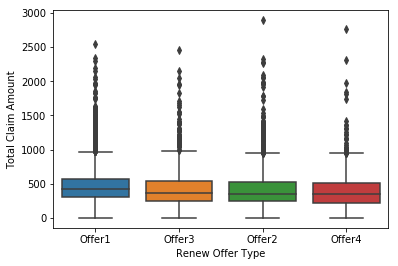

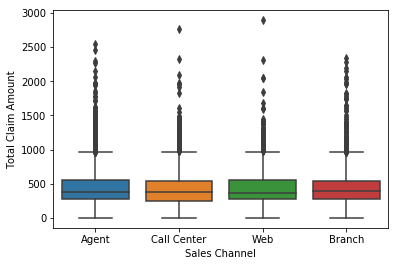

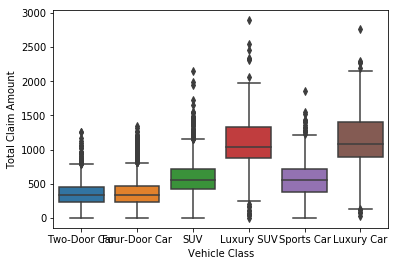

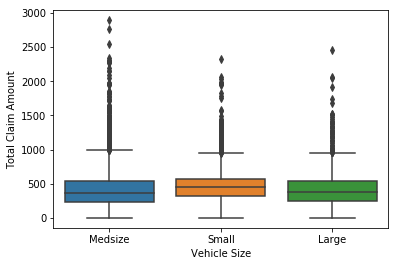

In [20]:
for i in range(0,len(l2)):
    sns.boxplot(l2[i],df['Total Claim Amount'],data=df)
    plt.show()

In [21]:
df.Income.describe()

count     9134.000000
mean     37657.380009
std      30379.904734
min          0.000000
25%          0.000000
50%      33889.500000
75%      62320.000000
max      99981.000000
Name: Income, dtype: float64

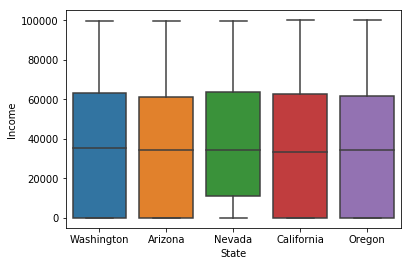

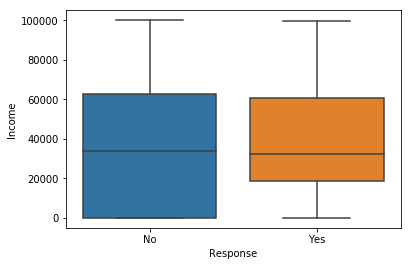

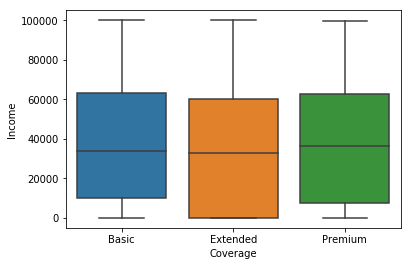

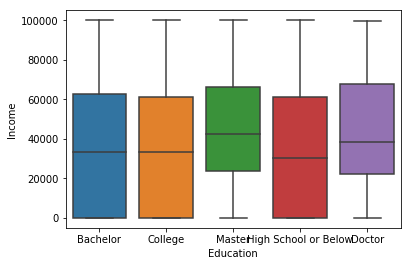

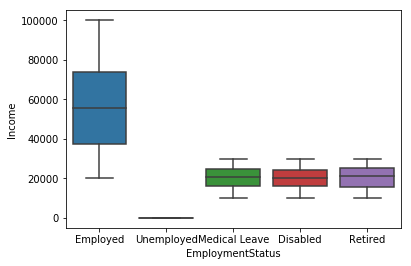

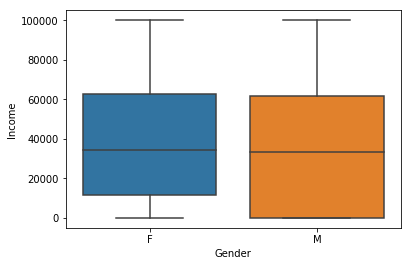

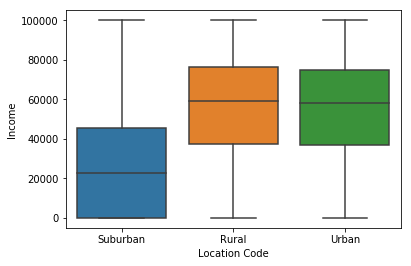

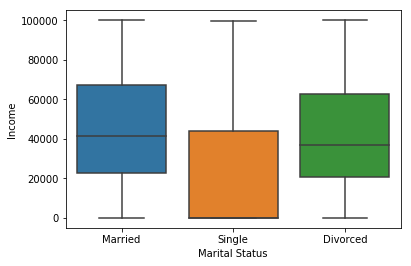

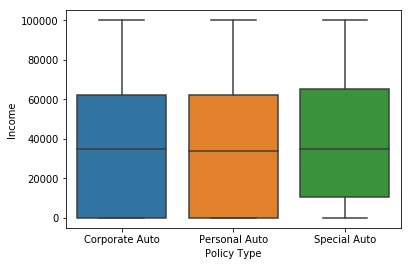

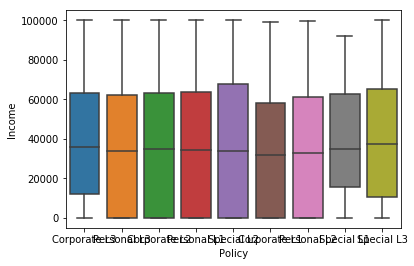

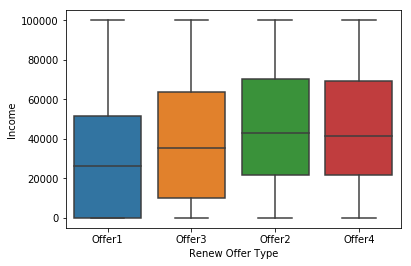

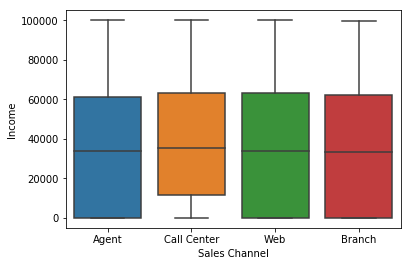

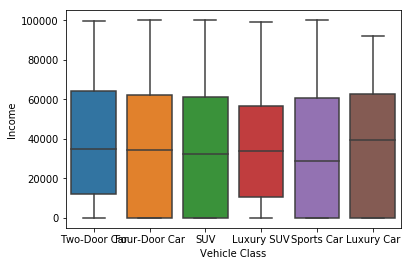

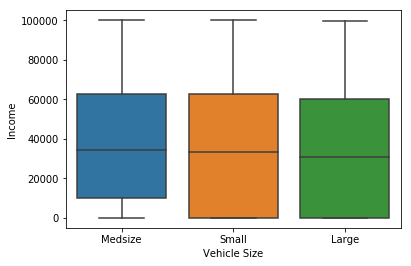

In [22]:
for i in range(0,len(l2)):
    sns.boxplot(l2[i],df['Income'],data=df)
    plt.show()

# Multivariate Analysis

In [23]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [24]:
df.describe(include=['O'])

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
count,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134
unique,9134,5,2,3,5,59,5,2,3,3,3,9,4,4,6,3
top,PF40592,California,No,Basic,Bachelor,1/10/2011,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
freq,1,3150,7826,5568,2748,195,5698,4658,5779,5298,6788,3426,3752,3477,4621,6424


In [25]:
df.corr()
# Our target Variable is Customer Lifetime Value, we see that claim amount and monthly premium have strong 
# correlation with it.
# Also, Claim and Premium in themselves have strong correlation
# Income and Claim amount have negative correlation

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


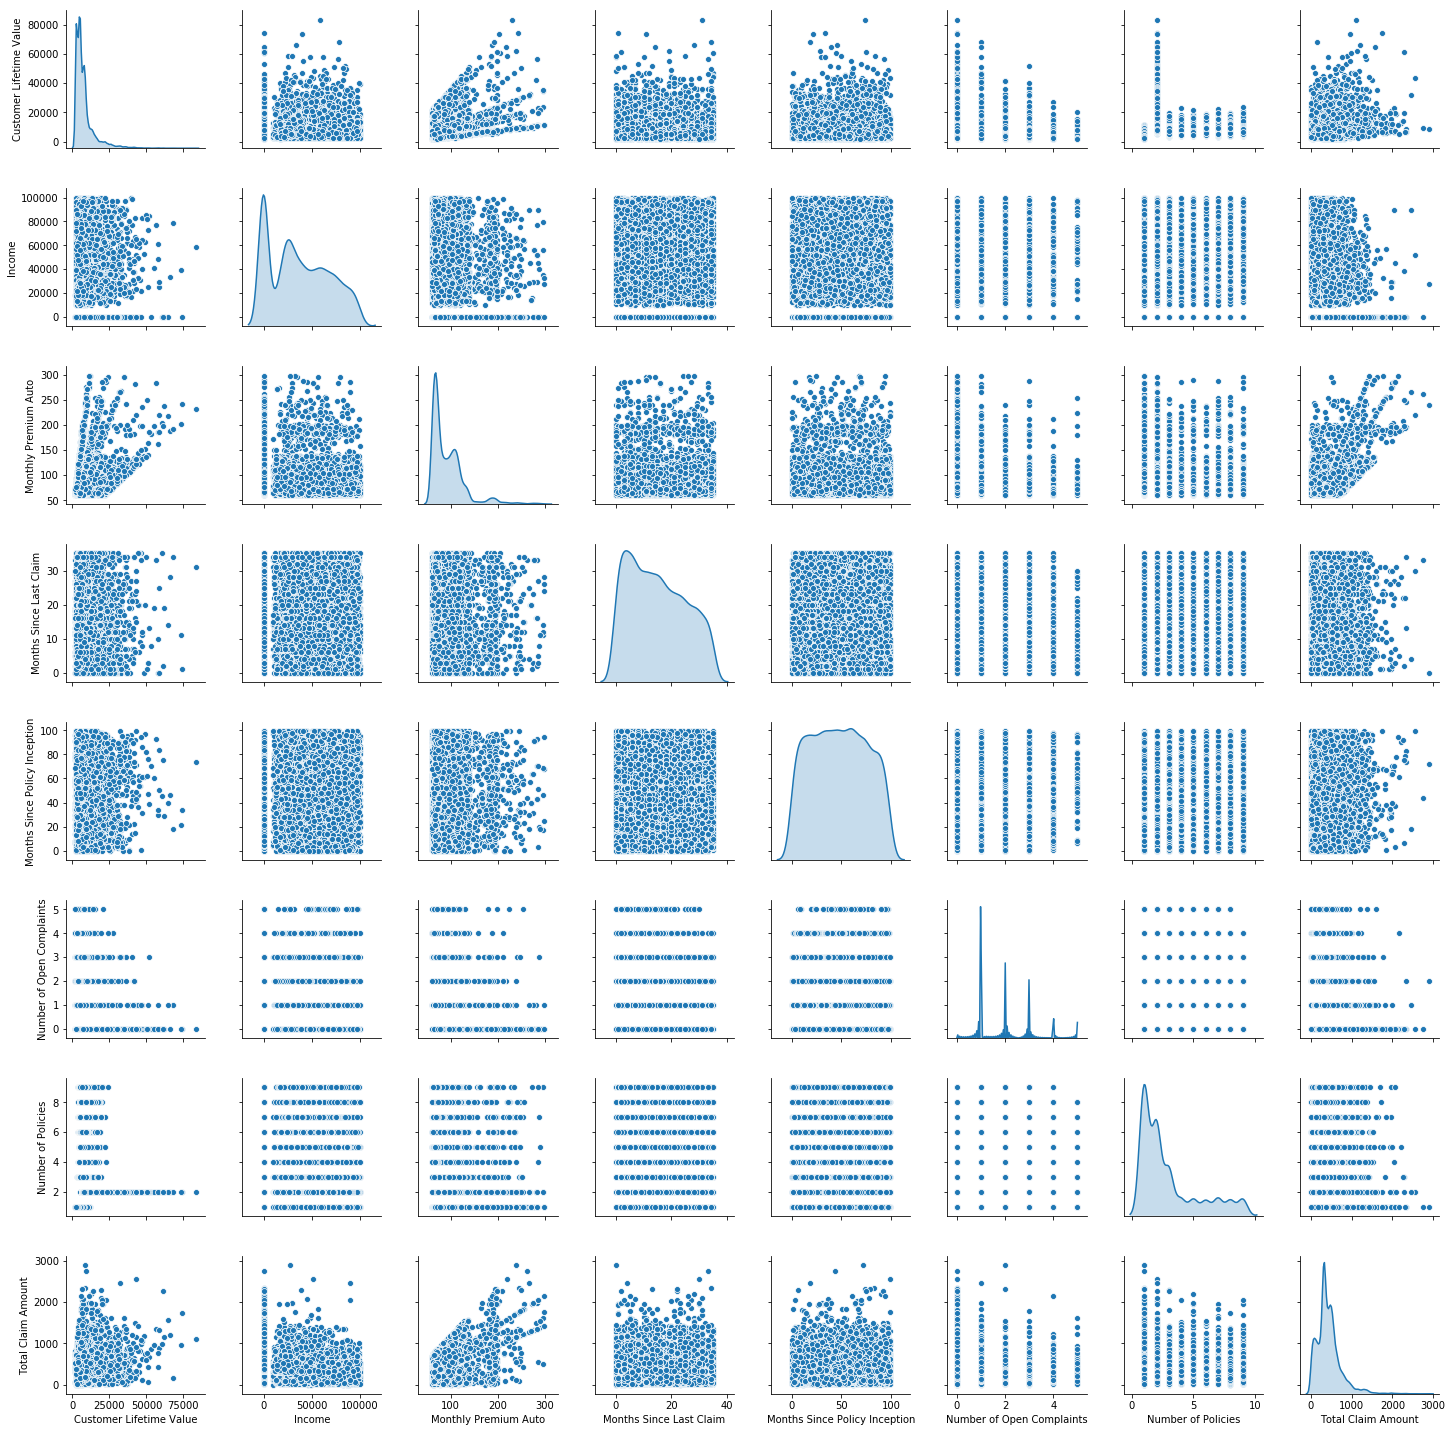

In [26]:
sns.pairplot(df, diag_kind='kde')

# We see that Custome Lifetime Value and Income has no correlation.
# Customer Lifetime Value and Premium have heteroskedastic plot.
# Customer Lifetime Value and Claim also have heteroskedastic plot.
# Premium and Claim also have heteroskedastic plot.

# General Pattern Recognition Analysis

In [ ]:
# The income 0 is of people who are unemployed.

# Can remove policy and customer id and effective to date.

# TCA < 15 is from rural areas only.

# rural areas have only two-door, four-door, SUV and Sports_car 

# MPA can be normalized by taking particular coverage and vehicle_class

### ANOVA TEST

In [28]:
df.rename({'Customer Lifetime Value':'CLV', 'Location Code':'Location_Code', 'Monthly Premium Auto':'MPA', 
           'Total Claim Amount':'TCA', 'Sales Channel':'Sales_Channel', 'Policy Type':'Policy_Type', 'Vehicle Class': 'Vehicle_Class', 
           'Marital Status':'Marital_Status', 'Vehicle Size':'Vehicle_Size'}, inplace=True, axis=1)

In [29]:
model = ols("CLV ~ Coverage", data = df).fit()
print(sms.stats.anova_lm(model))

              df        sum_sq       mean_sq           F        PR(>F)
Coverage     2.0  1.226530e+10  6.132650e+09  133.675114  6.015897e-58
Residual  9131.0  4.189054e+11  4.587728e+07         NaN           NaN


In [30]:
print(pairwise_tukeyhsd(df['CLV'], df['Coverage']))

  Multiple Comparison of Means - Tukey HSD,FWER=0.05  
 group1   group2   meandiff   lower     upper   reject
------------------------------------------------------
 Basic   Extended 1598.9712 1228.5544  1969.388  True 
 Basic   Premium  3704.8967 3112.2735 4297.5198  True 
Extended Premium  2105.9255 1475.1616 2736.6893  True 
------------------------------------------------------


In [31]:
model = ols("TCA ~ Coverage", data = df).fit()
print(sms.stats.anova_lm(model))

              df        sum_sq       mean_sq           F         PR(>F)
Coverage     2.0  6.171094e+07  3.085547e+07  397.363978  3.372121e-166
Residual  9131.0  7.090257e+08  7.765039e+04         NaN            NaN


In [32]:
print(pairwise_tukeyhsd(df['TCA'], df['Coverage']))

 Multiple Comparison of Means - Tukey HSD,FWER=0.05
 group1   group2  meandiff  lower    upper   reject
---------------------------------------------------
 Basic   Extended 101.5426 86.3033  116.7818  True 
 Basic   Premium  272.3539 247.9729 296.7349  True 
Extended Premium  170.8114 144.8612 196.7615  True 
---------------------------------------------------


In [33]:
model = ols("MPA ~ Coverage", data = df).fit()
print(sms.stats.anova_lm(model))

              df        sum_sq       mean_sq            F  PR(>F)
Coverage     2.0  2.302702e+06  1.151351e+06  1235.378095     0.0
Residual  9131.0  8.509932e+06  9.319825e+02          NaN     NaN


In [34]:
print(pairwise_tukeyhsd(df['MPA'], df['Coverage']))

Multiple Comparison of Means - Tukey HSD,FWER=0.05
 group1   group2  meandiff  lower   upper  reject
-------------------------------------------------
 Basic   Extended 21.4057  19.7361 23.0752  True 
 Basic   Premium  51.2072  48.5362 53.8783  True 
Extended Premium  29.8016  26.9586 32.6445  True 
-------------------------------------------------


In [35]:
model = ols("CLV ~ Sales_Channel", data = df).fit()
print(sms.stats.anova_lm(model))

                   df        sum_sq       mean_sq         F    PR(>F)
Sales_Channel     3.0  1.247171e+08  4.157236e+07  0.880545  0.450278
Residual       9130.0  4.310460e+11  4.721205e+07       NaN       NaN


In [36]:
model = ols("TCA ~ Sales_Channel", data = df).fit()
print(sms.stats.anova_lm(model))

                   df        sum_sq       mean_sq         F    PR(>F)
Sales_Channel     3.0  1.338658e+05  44621.925499  0.528675  0.662574
Residual       9130.0  7.706028e+08  84403.370713       NaN       NaN


In [37]:
model = ols("CLV ~ Vehicle_Class", data = df).fit()
print(sms.stats.anova_lm(model))

                   df        sum_sq       mean_sq           F         PR(>F)
Vehicle_Class     5.0  5.504256e+10  1.100851e+10  267.158117  2.085526e-267
Residual       9128.0  3.761282e+11  4.120598e+07         NaN            NaN


In [38]:
print(pairwise_tukeyhsd(df['CLV'], df['Vehicle_Class']))

         Multiple Comparison of Means - Tukey HSD,FWER=0.05         
    group1       group2      meandiff     lower      upper    reject
--------------------------------------------------------------------
Four-Door Car  Luxury Car   10421.6218  8963.4761  11879.7675  True 
Four-Door Car  Luxury SUV   10491.2725  9115.8475  11866.6975  True 
Four-Door Car     SUV       3811.7852   3303.0263  4320.5441   True 
Four-Door Car  Sports Car   4119.2627   3245.1361  4993.3893   True 
Four-Door Car Two-Door Car   39.3041    -460.6368   539.2451  False 
  Luxury Car   Luxury SUV    69.6507    -1898.3676 2037.6691  False 
  Luxury Car      SUV       -6609.8366  -8106.5456 -5113.1276  True 
  Luxury Car   Sports Car   -6302.3591  -7959.2838 -4645.4344  True 
  Luxury Car  Two-Door Car -10382.3177 -11876.0523 -8888.583   True 
  Luxury SUV      SUV       -6679.4873  -8095.7299 -5263.2448  True 
  Luxury SUV   Sports Car   -6372.0098  -7956.6248 -4787.3948  True 
  Luxury SUV  Two-Door Car -10451.

In [39]:
model = ols("TCA ~ Vehicle_Class", data = df).fit()
print(sms.stats.anova_lm(model))

                   df        sum_sq       mean_sq          F  PR(>F)
Vehicle_Class     5.0  2.436778e+08  4.873556e+07  844.03904     0.0
Residual       9128.0  5.270588e+08  5.774089e+04        NaN     NaN


In [40]:
print(pairwise_tukeyhsd(df['TCA'], df['Vehicle_Class']))

       Multiple Comparison of Means - Tukey HSD,FWER=0.05      
    group1       group2     meandiff   lower     upper   reject
---------------------------------------------------------------
Four-Door Car  Luxury Car   778.5286  723.945   833.1122  True 
Four-Door Car  Luxury SUV   740.7647  689.2776  792.2518  True 
Four-Door Car     SUV       217.8126  198.768   236.8573  True 
Four-Door Car  Sports Car   206.3876  173.6659  239.1093  True 
Four-Door Car Two-Door Car  -1.2174   -19.932   17.4971  False 
  Luxury Car   Luxury SUV   -37.7639 -111.4339  35.9061  False 
  Luxury Car      SUV       -560.716 -616.7432 -504.6888  True 
  Luxury Car   Sports Car   -572.141 -634.1656 -510.1163  True 
  Luxury Car  Two-Door Car  -779.746 -835.6619 -723.8302  True 
  Luxury SUV      SUV      -522.9521 -575.9671  -469.937  True 
  Luxury SUV   Sports Car  -534.3771 -593.6949 -475.0592  True 
  Luxury SUV  Two-Door Car -741.9822 -794.8795 -689.0848  True 
     SUV       Sports Car   -11.425   -4

In [41]:
model = ols("CLV ~ State", data = df).fit()
print(sms.stats.anova_lm(model))

              df        sum_sq       mean_sq         F    PR(>F)
State        4.0  5.154972e+07  1.288743e+07  0.272893  0.895599
Residual  9129.0  4.311192e+11  4.722523e+07       NaN       NaN


In [42]:
model = ols("TCA ~ State", data = df).fit()
print(sms.stats.anova_lm(model))

              df        sum_sq       mean_sq         F    PR(>F)
State        4.0  1.997861e+05  49946.534795  0.591746  0.668611
Residual  9129.0  7.705369e+08  84405.395360       NaN       NaN


In [43]:
model = ols("MPA ~ State", data = df).fit()
print(sms.stats.anova_lm(model))

              df        sum_sq      mean_sq         F    PR(>F)
State        4.0  6.160228e+03  1540.057109  1.300996  0.267088
Residual  9129.0  1.080647e+07  1183.752167       NaN       NaN


In [44]:
model = ols("CLV ~ Location_Code", data = df).fit()
print(sms.stats.anova_lm(model))

                   df        sum_sq       mean_sq         F    PR(>F)
Location_Code     2.0  1.019959e+07  5.099797e+06  0.108002  0.897627
Residual       9131.0  4.311605e+11  4.721942e+07       NaN       NaN


In [45]:
model = ols("TCA ~ Location_Code", data = df).fit()
print(sms.stats.anova_lm(model))

                   df        sum_sq       mean_sq            F  PR(>F)
Location_Code     2.0  2.984032e+08  1.492016e+08  2884.317245     0.0
Residual       9131.0  4.723335e+08  5.172856e+04          NaN     NaN


In [46]:
print(pairwise_tukeyhsd(df['TCA'], df['Location_Code']))

  Multiple Comparison of Means - Tukey HSD,FWER=0.05  
 group1   group2   meandiff   lower     upper   reject
------------------------------------------------------
 Rural   Suburban  452.2548  437.7807  466.7288  True 
 Rural    Urban    219.6672  201.2286  238.1059  True 
Suburban  Urban   -232.5875 -247.7154 -217.4596  True 
------------------------------------------------------


In [47]:
model = ols("MPA ~ Location_Code", data = df).fit()
print(sms.stats.anova_lm(model))

                   df        sum_sq       mean_sq          F        PR(>F)
Location_Code     2.0  6.342896e+04  31714.480237  26.940125  2.159916e-12
Residual       9131.0  1.074920e+07   1177.220984        NaN           NaN


In [48]:
print(pairwise_tukeyhsd(df['MPA'], df['Location_Code']))

Multiple Comparison of Means - Tukey HSD,FWER=0.05
 group1   group2  meandiff  lower   upper  reject
-------------------------------------------------
 Rural   Suburban  5.4211   3.2375  7.6046  True 
 Rural    Urban   -0.0955  -2.8771  2.6861 False 
Suburban  Urban   -5.5165  -7.7987 -3.2344  True 
-------------------------------------------------


In [49]:
model = ols("CLV ~ Marital_Status", data = df).fit()
print(sms.stats.anova_lm(model))

                    df        sum_sq       mean_sq         F    PR(>F)
Marital_Status     2.0  3.130963e+08  1.565482e+08  3.317665  0.036281
Residual        9131.0  4.308576e+11  4.718625e+07       NaN       NaN


In [50]:
print(pairwise_tukeyhsd(df['CLV'], df['Marital_Status']))

 Multiple Comparison of Means - Tukey HSD,FWER=0.05 
 group1   group2  meandiff   lower     upper  reject
----------------------------------------------------
Divorced Married -162.2722 -650.4633  325.919 False 
Divorced  Single -526.4021 -1069.0716 16.2673 False 
Married   Single  -364.13  -756.6054  28.3455 False 
----------------------------------------------------


In [51]:
model = ols("TCA ~ Marital_Status", data = df).fit()
print(sms.stats.anova_lm(model))

                    df        sum_sq       mean_sq           F         PR(>F)
Marital_Status     2.0  5.179979e+07  2.589989e+07  328.946735  1.127802e-138
Residual        9131.0  7.189369e+08  7.873583e+04         NaN            NaN


In [52]:
print(pairwise_tukeyhsd(df['TCA'], df['Marital_Status']))

Multiple Comparison of Means - Tukey HSD,FWER=0.05
 group1   group2 meandiff  lower    upper   reject
--------------------------------------------------
Divorced Married -19.1877 -39.1297  0.7543  False 
Divorced  Single 153.7027 131.5353  175.87   True 
Married   Single 172.8904 156.8582 188.9225  True 
--------------------------------------------------


In [53]:
model = ols("MPA ~ Marital_Status", data = df).fit()
print(sms.stats.anova_lm(model))

                    df        sum_sq      mean_sq         F    PR(>F)
Marital_Status     2.0  1.733633e+03   866.816556  0.732122  0.480916
Residual        9131.0  1.081090e+07  1183.977673       NaN       NaN


In [54]:
model = ols("CLV ~ EmploymentStatus", data = df).fit()
print(sms.stats.anova_lm(model))

                      df        sum_sq       mean_sq         F    PR(>F)
EmploymentStatus     4.0  7.185630e+08  1.796407e+08  3.809809  0.004251
Residual          9129.0  4.304522e+11  4.715217e+07       NaN       NaN


In [55]:
print(pairwise_tukeyhsd(df['CLV'], df['EmploymentStatus']))

        Multiple Comparison of Means - Tukey HSD,FWER=0.05       
    group1        group2     meandiff   lower      upper   reject
-----------------------------------------------------------------
   Disabled      Employed    371.2284  -592.214  1334.6708 False 
   Disabled   Medical Leave -206.0669 -1501.8615 1089.7277 False 
   Disabled      Retired    -360.0242 -1813.0359 1092.9875 False 
   Disabled     Unemployed  -211.5696 -1220.5816  797.4424 False 
   Employed   Medical Leave -577.2953 -1512.2056  357.615  False 
   Employed      Retired    -731.2526 -1874.151   411.6458 False 
   Employed     Unemployed   -582.798 -1044.4028 -121.1932  True 
Medical Leave    Retired    -153.9573 -1588.2094 1280.2948 False 
Medical Leave   Unemployed   -5.5027  -987.3078   976.3024 False 
   Retired      Unemployed   148.4546 -1033.1125 1330.0217 False 
-----------------------------------------------------------------


In [56]:
model = ols("TCA ~ EmploymentStatus", data = df).fit()
print(sms.stats.anova_lm(model))

                      df        sum_sq       mean_sq           F  \
EmploymentStatus     4.0  9.837177e+07  2.459294e+07  333.909435   
Residual          9129.0  6.723649e+08  7.365154e+04         NaN   

                         PR(>F)  
EmploymentStatus  1.221030e-268  
Residual                    NaN  


In [57]:
print(pairwise_tukeyhsd(df['TCA'], df['EmploymentStatus']))

      Multiple Comparison of Means - Tukey HSD,FWER=0.05      
    group1        group2     meandiff  lower    upper   reject
--------------------------------------------------------------
   Disabled      Employed   -116.4358 -154.513 -78.3585  True 
   Disabled   Medical Leave  -2.7776  -53.9901  48.435  False 
   Disabled      Retired     15.1896  -42.2365 72.6157  False 
   Disabled     Unemployed   124.8683  84.99   164.7466  True 
   Employed   Medical Leave  113.6582 76.7086  150.6078  True 
   Employed      Retired     131.6254 86.4556  176.7951  True 
   Employed     Unemployed   241.3041 223.0605 259.5477  True 
Medical Leave    Retired     17.9672  -38.7175 74.6518  False 
Medical Leave   Unemployed   127.6459 88.8429  166.4489  True 
   Retired      Unemployed   109.6787 62.9807  156.3767  True 
--------------------------------------------------------------


In [58]:
model = ols("MPA ~ EmploymentStatus", data = df).fit()
print(sms.stats.anova_lm(model))

                      df        sum_sq      mean_sq         F    PR(>F)
EmploymentStatus     4.0  6.760676e+03  1690.168988  1.427886  0.221846
Residual          9129.0  1.080587e+07  1183.686393       NaN       NaN


In [59]:
model = ols("CLV ~ Policy", data = df).fit()
print(sms.stats.anova_lm(model))

              df        sum_sq       mean_sq         F    PR(>F)
Policy       8.0  4.471026e+08  5.588782e+07  1.183999  0.304195
Residual  9125.0  4.307236e+11  4.720259e+07       NaN       NaN


In [60]:
model = ols("TCA ~ Policy", data = df).fit()
print(sms.stats.anova_lm(model))

              df        sum_sq       mean_sq         F    PR(>F)
Policy       8.0  2.805780e+05  35072.255535  0.415383  0.912444
Residual  9125.0  7.704561e+08  84433.541078       NaN       NaN


In [61]:
model = ols("MPA ~ Policy", data = df).fit()
print(sms.stats.anova_lm(model))

              df        sum_sq      mean_sq         F    PR(>F)
Policy       8.0  3.944212e+03   493.026450  0.416227  0.911954
Residual  9125.0  1.080869e+07  1184.513923       NaN       NaN


In [62]:
model = ols("CLV ~ Vehicle_Size", data = df).fit()
print(sms.stats.anova_lm(model))

                  df        sum_sq       mean_sq         F    PR(>F)
Vehicle_Size     2.0  2.248880e+08  1.124440e+08  2.382495  0.092377
Residual      9131.0  4.309458e+11  4.719591e+07       NaN       NaN


In [63]:
model = ols("TCA~ Vehicle_Size", data = df).fit()
print(sms.stats.anova_lm(model))

                  df        sum_sq       mean_sq          F        PR(>F)
Vehicle_Size     2.0  6.724094e+06  3.362047e+06  40.181081  4.225923e-18
Residual      9131.0  7.640125e+08  8.367238e+04        NaN           NaN


In [64]:
print(pairwise_tukeyhsd(df['TCA'], df['Vehicle_Size']))

Multiple Comparison of Means - Tukey HSD,FWER=0.05
 group1  group2 meandiff  lower    upper  reject
------------------------------------------------
 Large  Medsize -5.9882  -29.6012 17.6248 False 
 Large   Small   63.362  36.0373  90.6867  True 
Medsize  Small  69.3502  51.1237  87.5767  True 
------------------------------------------------


In [65]:
model = ols("MPA~ Vehicle_Size", data = df).fit()
print(sms.stats.anova_lm(model))

                  df        sum_sq      mean_sq         F    PR(>F)
Vehicle_Size     2.0  3.611907e+03  1805.953719  1.525593  0.217548
Residual      9131.0  1.080902e+07  1183.771970       NaN       NaN


In [66]:
model = ols("CLV ~ Education", data = df).fit()
print(sms.stats.anova_lm(model))

               df        sum_sq       mean_sq         F    PR(>F)
Education     4.0  4.572508e+08  1.143127e+08  2.422865  0.046036
Residual   9129.0  4.307135e+11  4.718079e+07       NaN       NaN


In [67]:
print(pairwise_tukeyhsd(df['CLV'], df['Education']))

               Multiple Comparison of Means - Tukey HSD,FWER=0.05              
       group1               group2         meandiff   lower      upper   reject
-------------------------------------------------------------------------------
      Bachelor             College         -21.5958 -530.3145   487.123  False 
      Bachelor              Doctor        -352.3156 -1426.8799  722.2488 False 
      Bachelor       High School or Below  424.0486  -87.559    935.6563 False 
      Bachelor              Master         370.8243 -404.9004   1146.549 False 
      College               Doctor        -330.7198 -1406.7692  745.3296 False 
      College        High School or Below  445.6444  -69.0752   960.3639 False 
      College               Master          392.42  -385.3605  1170.2006 False 
       Doctor        High School or Below  776.3642  -301.054  1853.7824 False 
       Doctor               Master         723.1399 -501.9464  1948.2261 False 
High School or Below        Master      

In [68]:
model = ols("TCA ~ Education", data = df).fit()
print(sms.stats.anova_lm(model))

               df        sum_sq       mean_sq          F        PR(>F)
Education     4.0  1.613393e+07  4.033482e+06  48.796084  1.116218e-40
Residual   9129.0  7.546027e+08  8.265995e+04        NaN           NaN


In [69]:
print(pairwise_tukeyhsd(df['TCA'], df['Education']))

              Multiple Comparison of Means - Tukey HSD,FWER=0.05              
       group1               group2         meandiff   lower     upper   reject
------------------------------------------------------------------------------
      Bachelor             College         -4.1811   -25.4744  17.1122  False 
      Bachelor              Doctor         -89.8074 -134.7851  -44.8297  True 
      Bachelor       High School or Below  59.1958   37.7815    80.61    True 
      Bachelor              Master         -77.7566 -110.2259  -45.2873  True 
      College               Doctor         -85.6263 -130.6662  -40.5864  True 
      College        High School or Below  63.3768   41.8324   84.9213   True 
      College               Master         -73.5755 -106.1309  -41.0202  True 
       Doctor        High School or Below  149.0032  103.906   194.1003  True 
       Doctor               Master         12.0508   -39.2273  63.3288  False 
High School or Below        Master        -136.9524 

In [70]:
model = ols("MPA ~ Education", data = df).fit()
print(sms.stats.anova_lm(model))

               df        sum_sq      mean_sq         F    PR(>F)
Education     4.0  1.019106e+04  2547.765644  2.153083  0.071645
Residual   9129.0  1.080244e+07  1183.310625       NaN       NaN


#### OBSERVATIONS:

There are outliers in our dataset wrt Total Claim Amount(TCA), Monthly Premium Auto(MPA), and Customer Lifetime Value(CLV).

Upon further investigation we found that TCA, MPA and CLV vary wrt Coverage.

Upon further investigation we found that TCA, MPA and CLV vary wrt Vehicle Class where two-door and four-door are not different, SUV and sports car are not different from each other and Luxury cars and Luxury SUVs are not different from each other.

While, location code impacts only MPA and TCA.

Marital status impacts TCA, where single is significantly different from married and divorced.

Employment Status impacts TCA and CLV where, Retired, Medical Leave and Disable have no significant difference among them.

Vehicle size impacts TCA, where small car is different than medium and large cars

Education also wrt TCA where Bachelors and College have no difference among them and Masters and Doctor have no difference among them.

### Feature extraction

In [104]:
df['Annual_Claim_Amount'] = df['TCA']/(df['Months Since Policy Inception']/12)

In [105]:
df['Annual_Premium'] = df['MPA']*12

In [106]:
df['Per_policy_cost'] = df['TCA']/df['Number of Policies']